# Activity 2.1 : Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [3]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


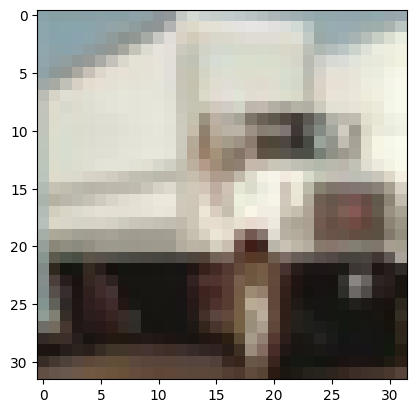

In [4]:
print(y_train[444])
plt.imshow(x_train[444]);

In [5]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [6]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

Convert to float and scale the datasets

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [ ]:
model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,162 (707.66 KB)

 Trainable params: 181,162 (707.66 KB)

 Non-trainable params: 0 (0.00 B)

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [ ]:
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.2907 - loss: 1.9200 - val_accuracy: 0.4842 - val_loss: 1.4151
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.4681 - loss: 1.4711 - val_accuracy: 0.5376 - val_loss: 1.2800
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.5173 - loss: 1.3585 - val_accuracy: 0.5638 - val_loss: 1.2436
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5390 - loss: 1.2872 - val_accuracy: 0.5708 - val_loss: 1.2040
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5646 - loss: 1.2230 - val_accuracy: 0.6029 - val_loss: 1.1205
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.5750 - loss: 1.2048 - val_accuracy: 0.6102 - val_loss: 1.1100
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5872 - loss: 1.1771 - val_accuracy: 0.6049 - val_loss: 1.1061
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5937 -

#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [ ]:
new_model = Sequential()

## 5x5 convolution with 1 stride
new_model.add(Conv2D(32, (5, 5), strides = 1, padding='same',
                 input_shape=x_train.shape[1:]))
new_model.add(Activation('relu'))

## 5x5 convolution with 1 stride
new_model.add(Conv2D(32, (5, 5), strides = 1))
new_model.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
new_model.add(MaxPooling2D(pool_size=(2, 2)))
new_model.add(Dropout(0.25))

## 5x5 convolution with 1 stride
new_model.add(Conv2D(32, (5, 5), strides = 1, padding='same',
                 input_shape=x_train.shape[1:]))
new_model.add(Activation('relu'))

## 5x5 convolution with 1 stride
new_model.add(Conv2D(32, (5, 5), strides = 1))
new_model.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
new_model.add(MaxPooling2D(pool_size=(2, 2)))
new_model.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
new_model.add(Flatten())
new_model.add(Dense(512))
new_model.add(Activation('relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(num_classes))
new_model.add(Activation('softmax'))

new_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 10, 10, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       410,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 494,570 (1.89 MB)

 Trainable params: 494,570 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005)


new_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

new_model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 373s 238ms/step - accuracy: 0.3038 - loss: 1.8780 - val_accuracy: 0.5162 - val_loss: 1.3787
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 380s 236ms/step - accuracy: 0.5265 - loss: 1.3245 - val_accuracy: 0.5856 - val_loss: 1.1480
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 379s 235ms/step - accuracy: 0.5993 - loss: 1.1317 - val_accuracy: 0.6554 - val_loss: 0.9827
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 382s 235ms/step - accuracy: 0.6422 - loss: 1.0259 - val_accuracy: 0.6696 - val_loss: 0.9378
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 367s 235ms/step - accuracy: 0.6680 - loss: 0.9554 - val_accuracy: 0.6520 - val_loss: 0.9916


> ***There was a slight improvement. The accuracy of both training and validation increased a little and the loss decreased a little. Considering the training time is only 5 epochs, we can modify the model to increase the accuracy more.***

In [15]:
# New model structure
enhanced_model = Sequential()

enhanced_model.add(Conv2D(32, (3, 3), strides = 1, padding='same', input_shape=x_train.shape[1:]))
enhanced_model.add(Activation('relu'))

enhanced_model.add(Conv2D(64, (3, 3), strides = 1, padding='same'))
enhanced_model.add(Activation('relu'))

enhanced_model.add(MaxPooling2D(pool_size=(2, 2)))
enhanced_model.add(Dropout(0.25))

enhanced_model.add(Flatten())
enhanced_model.add(Dense(512))
enhanced_model.add(Activation('relu'))
enhanced_model.add(Dropout(0.5))
enhanced_model.add(Dense(num_classes))
enhanced_model.add(Activation('softmax'))

enhanced_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,413,642 (32.10 MB)

 Trainable params: 8,413,642 (32.10 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# New model structure
# This time, I will use BatchNormalization because the validation overfits
from keras.layers import BatchNormalization

enhanced_model = Sequential()

# 32 filters
enhanced_model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
enhanced_model.add(Activation('relu'))
enhanced_model.add(BatchNormalization())

enhanced_model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
enhanced_model.add(Activation('relu'))
enhanced_model.add(BatchNormalization())

enhanced_model.add(MaxPooling2D(pool_size=(2, 2)))
enhanced_model.add(Dropout(0.2))

# 64 filters
enhanced_model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
enhanced_model.add(Activation('relu'))
enhanced_model.add(BatchNormalization())

enhanced_model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
enhanced_model.add(Activation('relu'))
enhanced_model.add(BatchNormalization())

enhanced_model.add(MaxPooling2D(pool_size=(2, 2)))
enhanced_model.add(Dropout(0.3))

# 128 filters
enhanced_model.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
enhanced_model.add(Activation('relu'))
enhanced_model.add(BatchNormalization())

enhanced_model.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
enhanced_model.add(Activation('relu'))
enhanced_model.add(BatchNormalization())

enhanced_model.add(MaxPooling2D(pool_size=(2, 2)))
enhanced_model.add(Dropout(0.4))

# Final
enhanced_model.add(Flatten())
enhanced_model.add(Dense(128))
enhanced_model.add(Activation('relu'))
enhanced_model.add(Dropout(0.5))
enhanced_model.add(Dense(10, activation='softmax'))

enhanced_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_56 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_74 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_75 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_76 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_77 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_78 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_79 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [35]:
batch_size = 32

# I change the opt to adam
#opt = keras.optimizers.RMSprop(learning_rate=0.0005)

enhanced_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = enhanced_model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=25,
              validation_data=(x_test, y_test))

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 12ms/step - accuracy: 0.2740 - loss: 2.0625 - val_accuracy: 0.4892 - val_loss: 1.4299
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4944 - loss: 1.3926 - val_accuracy: 0.6082 - val_loss: 1.0926
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5949 - loss: 1.1563 - val_accuracy: 0.6245 - val_loss: 1.1084
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6521 - loss: 1.0057 - val_accuracy: 0.7146 - val_loss: 0.8183
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6828 - loss: 0.9221 - val_accuracy: 0.7017 - val_loss: 0.8558
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7163 - loss: 0.8301 - val_accuracy: 0.7465 - val_loss: 0.7482
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7377 - loss: 0.7727 - val_accuracy: 0.7792 - val_loss: 0.6496
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7573 - loss: 

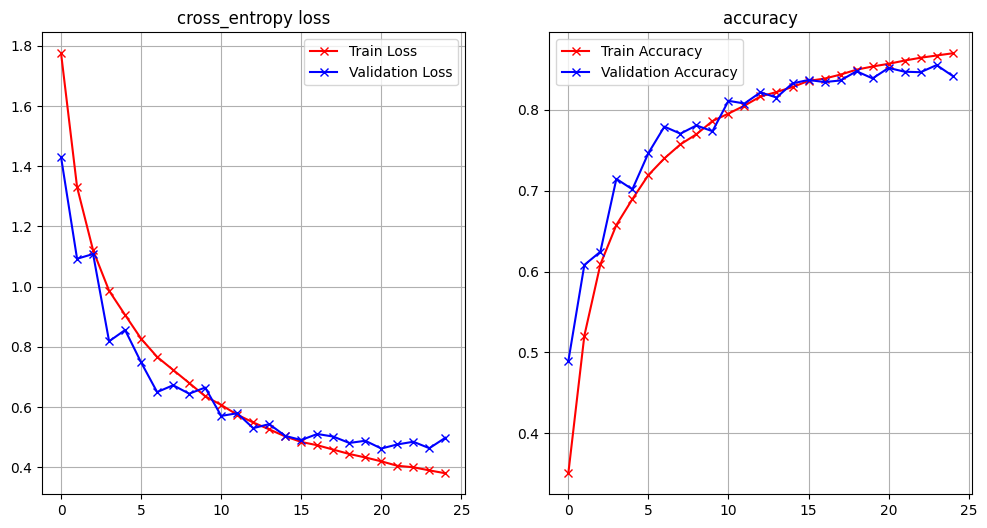

In [36]:
# Plotting because why not

def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

plot_loss_accuracy(history)

> ***I was able to reach 85%. I think this is the best I couuld do for now.***

# Conclusion

> In this activity, I was able to build a cnn model and managed to train it for image classification and achieved 85% on the CIFAR dataset. In the previous activity, we barely go above 60% because we weren't using convolutional networks. The routine of increasing the accuracy is about the same, I just added more layer and increased the number of filters and added regularization after each. I did this because when the model has only 3 hidden layers, I noticed it overfits as the epoch increase during training. I also changed the optimizer to adam, although I am not quite sure if it did anything. Overall, this activity helped me get an understanding on how to make my own cnn.